# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os 
import sys

repo_path = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
sys.path.append(repo_path)

In [3]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [4]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

In [ ]:
action = np.random.randint(action_size)

In [ ]:
env_info = env.step(action)[brain_name]

In [ ]:
next_state = env_info.vector_observations[0]

In [ ]:
reward = env_info.rewards[0]

In [ ]:
done = env_info.local_done[0]

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
acc_steps = 0
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    acc_steps += 1
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {} in {} steps {}".format(score, acc_steps))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
from collections import deque
import pandas as pd

def train(env, brain_name, agent, n_episodes=2000, max_t=1000,
        eps_start=1.0, eps_end=0.01, eps_decay=0.995,
        model_save_path='checkpoint.pth', score_solved=13., score_win=100):
    """
    Train DQ-Learning agent on a given environment, based on epsilon-greedy policy and GLIE evolution of epsilon parameter
    When the game is considered solved, save the  DQ-Net underlaying the agent in a given path
    Params
    ======
        env: Environment to solve an episodic game. Should behave like:
            state = env.reset()
            next_state, reward, done, _ = env.step(action)
        agent: DQ-Learning Agent, should estimate and optimal policy estimating Q function using a DQN
        n_episodes (int): Number of episodes to simulate
        max_t (int): Max number of time steps (transitions) on each episode
        eps_start (float): Epsilon parameter starting value (at first episode)
        eps_end (float): Epsilon min value
        eps_decay (float): Epsilon decay rate
        model_save_path (str): Path to persist model
        score_solved (float): Score to consider the game solved
    Returns
    ======
    scores (list): Average reward over 100 episodes
    """

    scores = []  # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start  # initialize epsilon
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.vector_observations[0]  # get the current state
        score = 0  # initialize the score
        for t in range(max_t):
            action = agent.act(state, eps)

            env_info = env.step(action)[brain_name]  # send the action to the environment
            next_state = env_info.vector_observations[0]  # get the next state
            reward = env_info.rewards[0]  # get the reward
            done = env_info.local_done[0]  # see if episode has finished

            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)  # save most recent score
        scores.append(score)  # save most recent score
        eps = update_epsilon(eps_end, eps_decay, eps)  # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % score_win == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window) >= score_solved:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(
                i_episode - score_win, np.mean(scores_window)))
            agent.save_network(model_save_path)
            break
    env.close()
    
    return pd.Series(index=range(1, len(scores) +1), data=scores, dtype=np.float32, name='score')

def update_epsilon(eps_end, eps_decay, eps_curr):
    """

    """
    return max(eps_end, eps_decay * eps_curr)

In [7]:
from src.dqn_agent import AgentDQ, AgentDuelDQ


In [8]:
agent_duelq = AgentDuelDQ(state_size=37, action_size=4, gamma=0.99, hidden_layers=[64, 32], drop_p=None,
                 batch_size=64, learning_rate=5e-4, soft_upd_param=1e-3, update_every=4, buffer_size=int(1e5), seed=123)


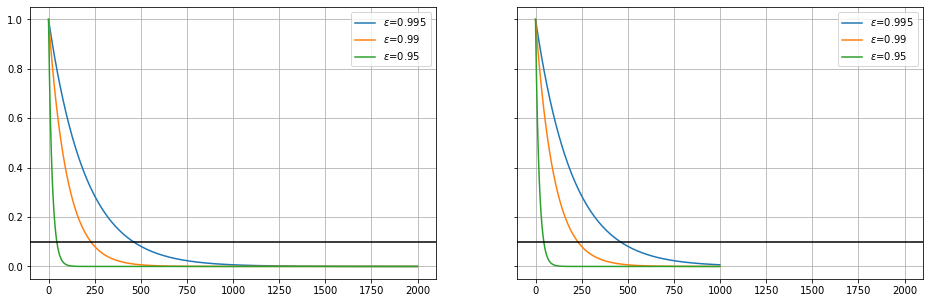

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(16, 5))
eps1, eps2, eps3 = 0.995, 0.99, 0.95

ax1 = axs[0]
neps1 = np.arange(2000)

ax1.plot(1*eps1**neps1, label=rf'$\epsilon$={eps1}')
ax1.plot(1*eps2**neps1, label=rf'$\epsilon$={eps2}')
ax1.plot(1*eps3**neps1, label=rf'$\epsilon$={eps3}')

ax2 = axs[1]
neps2 = np.arange(1000)
ax2.plot(1*eps1**neps2, label=rf'$\epsilon$={eps1}')
ax2.plot(1*eps2**neps2, label=rf'$\epsilon$={eps2}')
ax2.plot(1*eps3**neps2, label=rf'$\epsilon$={eps3}')

for ax in axs:
    ax.grid()
    ax.axhline(0.1, color='black')
    ax.legend()

plt.show()

In [10]:
scores_duelq = train(env, brain_name=brain_name, agent=agent_duelq, n_episodes=2000, max_t=1000, 
        eps_start=1.0, eps_end=0.01, eps_decay=0.995, model_save_path='models/duelq_checkpoint_v01.pth')

Episode 100	Average Score: 0.03
Episode 200	Average Score: 0.071
Episode 300	Average Score: 0.202
Episode 400	Average Score: 0.24
Episode 500	Average Score: -0.04
Episode 600	Average Score: -0.04
Episode 700	Average Score: 0.161
Episode 800	Average Score: -0.08
Episode 900	Average Score: 0.182
Episode 1000	Average Score: 0.27
Episode 1100	Average Score: 0.14
Episode 1200	Average Score: -0.10
Episode 1300	Average Score: -0.03
Episode 1400	Average Score: -0.02
Episode 1500	Average Score: -0.02
Episode 1600	Average Score: 0.101
Episode 1700	Average Score: 0.17
Episode 1800	Average Score: 0.061
Episode 1900	Average Score: 0.011
Episode 2000	Average Score: 0.031


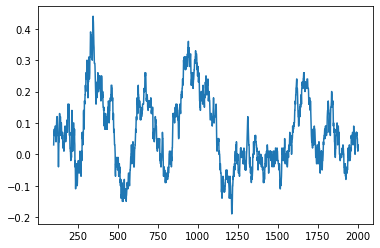

In [11]:
scores_duelq.rolling(100).mean().plot()
plt.show()

In [33]:
checkpoint_metadata = pd.Series(index=['N_episodes', 'gamma', 'hidden_layers', 'drop_p',
                 'batch_size', 'learning_rate', 'soft_upd_param', 'update_every', 'buffer_size', 'solved',
                'checkpoint'],
         data = [len(scores_duelq), 0.99, [64, 32], None, 64, 5e-4, 1e-3, 4, int(1e5),  False, 'duelq_checkpoint_v01.pth'], name='experiment:dueldq:v01')
checkpoint_metadata

N_episodes                        2000
gamma                             0.99
hidden_layers                 [64, 32]
drop_p                             0.2
batch_size                          64
learning_rate                   0.0005
soft_upd_param                   0.001
update_every                         4
buffer_size                     100000
solved                           False
checkpoint        duelq_checkpoint.pth
Name: experiment:dueldq:v01, dtype: object

In [27]:
import datetime as dt
experiment_dt = dt.datetime.strftime(dt.datetime.now(), "%Y%m%d%H%M%S")

In [34]:
checkpoint_metadata.to_json(f'models/experiments/hparams_{experiment_dt}.json')

In [29]:
scores_df = scores_duelq.to_frame('score')
scores_df['score_mave100'] = scores_df['score'].rolling(100).mean()
scores_df['experiment'] = 'dueldq:v01'
scores_df.index.name = 'idx_episode'

In [31]:
scores_df.to_csv(f'models/experiments/scores_{experiment_dt}.csv')